In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_table('https://raw.githubusercontent.com/krishnaik06/DNA-Sequencing-Classifier/master/human_data.txt')
df.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


## Our target variable is class which has 6 different labels as the sequences belong to a gene and every sequence has 4 nucleotides or bases i.e. A,T, G, C.

## Our job is to convert the sequence into k-mers (for each seq) and then convert those fixed size k-mers of each sequence to vectors using BOW, TF-IDF etc.

## First we have to decide the length of kmer(6 in this case) and create subset vector of size 6 for each sequence

## We will define a function to collect all possible k-mers of particular length from any sequnce and apply tht kmers function to all sequences.

In [4]:
def getkmers(sequence,size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence)-size+1)]

#### Now lets apply this function to all sequnces

In [6]:
df['words']=df.apply(lambda x: getkmers(x['sequence']),axis=1)

#### we have converted the sequnces into short overlapping k-mers of length 6

In [7]:
df.head()

,sequence,class,words
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [8]:
df.drop('sequence',axis=1,inplace=True)

In [9]:
df.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [10]:
#now we have the list of all k-mers of length 6 of each sequence . 

### we now have the fixed vector size of each sequence and now we can apply BOW techniques . We have to convert list of kmers into string of sentences for each gene so that we can feed it to BOW

In [11]:
texts=list(df.words)

In [12]:
for item in range(len(texts)):
    texts[item]=' '.join(texts[item])

In [16]:
y=df['class'].values

In [18]:
print(texts[0])

atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaac

In [19]:
print(texts[1])

atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaaat aaaatc aaatct aatctg atctgt tctgtt ctgttc tgttcg gttcgc ttcgct tcgctt cgcttc gcttca cttcat ttcatt tcattc cattca attcat ttcatt tcattg cattgc attgcc ttgccc tgcccc gccccc ccccca ccccac cccaca ccacaa cacaat acaatc caatcc aatcct atccta tcctag cctagg ctaggc taggcc aggcct ggccta gcctac cctacc ctaccc tacccg acccgc cccgcc ccgccg cgccgc gccgca ccgcag cgcagt gcagta cagtac agtact gtactg tactga actgat ctgatc tgatca gatcat atcatt tcattc cattct attcta ttctat tctatt ctattt tatttc atttcc tttccc ttcccc tccccc ccccct cccctc ccctct cctcta ctctat tctatt ctattg tattga attgat ttgatc tgatcc gatccc atcccc tcccca ccccac cccacc ccacct cacctc acctcc cctcca ctccaa tccaaa ccaaat caaata aaatat aatatc atatct tatctc atctca tctcat ctcatc tcatca catcaa atcaac tcaaca caacaa aacaac acaacc caaccg aaccga accgac ccgact cgacta gactaa actaat ctaatc taatca aatcac atcacc tcacca caccac accacc ccaccc caccca acccaa cccaac ccaaca caacaa aacaat acaatg caatga aatgac atgact tgacta gactaa

### each sequnnce is converted into k-mers of length 6

In [20]:
#now apply bOW

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
cv=CountVectorizer(ngram_range=(4,4))  #random paramters or we can do hyper parameter tuning

In [24]:
X=cv.fit_transform(texts)

In [25]:
X.shape

(4380, 232414)

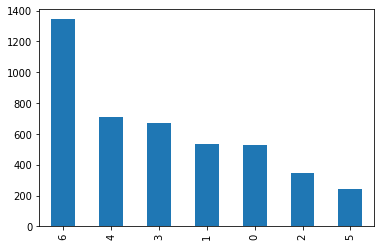

In [26]:
df['class'].value_counts().plot.bar()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
classifier=MultinomialNB(alpha=0.1)    #random alpha value or we can do grid search CV

In [31]:
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.1)

In [32]:
y_pred=classifier.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
print(accuracy_score(y_test,y_pred))

0.9817351598173516
